MP 12/2017

In [1]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

np.set_printoptions(precision=6, linewidth=110)

In [2]:
# https://scipy.github.io/old-wiki/pages/Cookbook/Matplotlib/UsingTex

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

## Read timing data

The npy files contain the fields `number, repeat, best, tc, retval_best` for each approximant.

In [3]:
# These were the settings in timings.py

f_mins = np.arange(10.0, 100.0, 5)
Mtot = 2*1.4

q = 1.0/1.01
chi1 = 0.1
chi2 = 0.1
lambda1 = 1286.0
lambda2 = 1286.0

# Fixed parameter space points for tidal and non-tidal test cases
x = np.array([q, chi1, chi2, lambda1, lambda2])
xnT = np.array([q, chi1, chi2, 0, 0])

The tests were done for linear spline order: `SEOBNRv4TSurrogate_LINEAR`. This code was also used for the PE runs. (That means that `tim_SEOBNRv4T_surrogate_cubic.npy` is an old file and should be ignored.)

In [4]:
ls *.npy

tim_IMRPhenomD_NRTidal.npy         tim_SEOBNRv4_ROM.npy
tim_SEOBNRv4T.npy                  tim_SEOBNRv4_ROM_NRTidal.npy
tim_SEOBNRv4T_surrogate_cubic.npy  tim_TF2.npy


In [4]:
dfs_SEOBNRv4T = np.load('tim_SEOBNRv4T.npy').T[-1]
dfs_SEOBNRv4T_surrogate = np.load('tim_SEOBNRv4T_surrogate.npy').T[-1]
#dfs_SEOBNRv4T_surrogate_cubic = np.load('tim_SEOBNRv4T_surrogate_cubic.npy').T[-1]

In [5]:
t_SEOBNRv4T = np.load('tim_SEOBNRv4T.npy').T[2]
t_SEOBNRv4T_surrogate_cubic = np.load('tim_SEOBNRv4T_surrogate_cubic.npy').T[2]
t_TF2 = np.load('tim_TF2.npy').T[2]
t_SEOBNRv4_ROM = np.load('tim_SEOBNRv4_ROM.npy').T[2]
t_SEOBNRv4_ROM_NRTidal = np.load('tim_SEOBNRv4_ROM_NRTidal.npy').T[2]
t_IMRPhenomD_NRTidal = np.load('tim_IMRPhenomD_NRTidal.npy').T[2]

In [6]:
d = {'SEOBNRv4T': t_SEOBNRv4T,
     'SEOBNRv4T\_surrogate\_cubic': t_SEOBNRv4T_surrogate_cubic,
     'TaylorF2': t_TF2,
     'SEOBNRv4\_ROM': t_SEOBNRv4_ROM,
     'SEOBNRv4\_ROM\_NRTidal': t_SEOBNRv4_ROM_NRTidal,
     'IMRPhenomD\_NRTidal': t_IMRPhenomD_NRTidal
    }
df = pd.DataFrame(d, index=f_mins)

In [7]:
df

,IMRPhenomD\_NRTidal,SEOBNRv4T,SEOBNRv4T\_surrogate\_cubic,SEOBNRv4\_ROM,SEOBNRv4\_ROM\_NRTidal,TaylorF2
10,2.275280,10471.806036,1.190067,1.181924,2.237635,0.830353
15,0.560523,2164.714263,0.311668,0.297614,0.543890,0.209777
20,0.267199,813.207369,0.151097,0.141535,0.265287,0.096408
25,0.134050,413.045138,0.079851,0.072198,0.132614,0.048095
30,0.132018,249.049783,0.080330,0.072254,0.132767,0.047919
35,0.065944,163.678914,0.045268,0.037337,0.067456,0.023865
40,0.065488,116.903511,0.045136,0.037294,0.067813,0.023708
45,0.032734,89.341095,0.027827,0.019910,0.034614,0.011842
50,0.032771,69.362583,0.027730,0.019505,0.034673,0.011781
55,0.016487,56.180029,0.019223,0.010534,0.020236,0.005912


3*10 evaluations of SEOBNRv4T from 10Hz: 

    10471. / 3600 * 30 / 24 ~ 3.6 days [vulcan]

## Plot speedup and inverse frequency spacing

In [8]:
speedup_cubic = df['SEOBNRv4T']/df['SEOBNRv4T\_surrogate\_cubic']

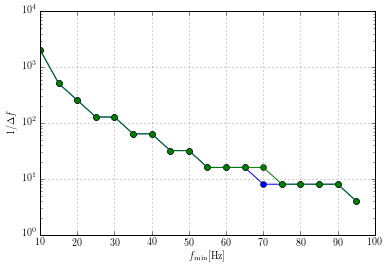

In [9]:
plt.semilogy(f_mins, 1./dfs_SEOBNRv4T, 'o-')
plt.semilogy(f_mins, 1./dfs_SEOBNRv4T_surrogate_cubic, 'o-');
plt.xlabel(r'$f_\mathrm{min}[\mathrm{Hz}]$')
plt.ylabel(r'$1 / \Delta f$')
plt.grid(alpha=0.7)
plt.savefig('SEOBNRv4T_surrogate_inv_dfs.pdf')
plt.savefig('SEOBNRv4T_surrogate_inv_dfs.png')

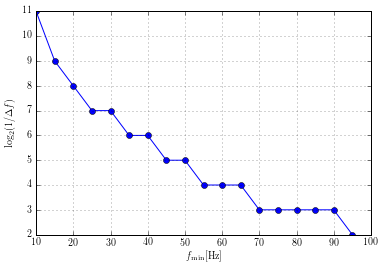

In [78]:
plt.plot(f_mins, np.log2(1./dfs_SEOBNRv4T), 'o-')
#plt.plot(f_mins, np.log2(1./dfs_SEOBNRv4T_surrogate_cubic), 'o-');
plt.xlabel(r'$f_\mathrm{min}[\mathrm{Hz}]$')
plt.ylabel(r'$\log_2 (1 / \Delta f)$')
plt.grid(alpha=0.7)
plt.savefig('SEOBNRv4T_surrogate_log2_inv_dfs.pdf')
plt.savefig('SEOBNRv4T_surrogate_log2_inv_dfs.png')

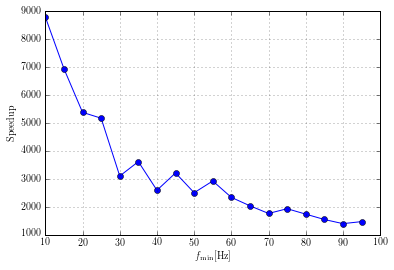

In [79]:
plt.plot(f_mins, speedup_cubic.values, 'o-')
plt.xlabel(r'$f_\mathrm{min}[\mathrm{Hz}]$')
plt.ylabel(r'$\mathrm{Speedup}$')
plt.grid(alpha=0.7)
plt.savefig('SEOBNRv4T_surrogate_speedup.pdf')
plt.savefig('SEOBNRv4T_surrogate_speedup.png')

In [101]:
# only plot the points where deltaF changes
idx = np.where(np.diff(np.log2(1./dfs_SEOBNRv4T)) < 0)

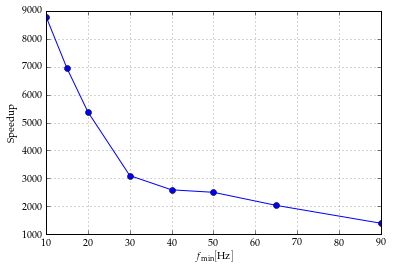

In [103]:
plt.plot(f_mins[idx], speedup_cubic.values[idx], 'o-')
plt.xlabel(r'$f_\mathrm{min}[\mathrm{Hz}]$')
plt.ylabel(r'$\mathrm{Speedup}$')
plt.grid(alpha=0.7)
plt.savefig('SEOBNRv4T_surrogate_speedup_deltaF_monontonic.pdf')
plt.savefig('SEOBNRv4T_surrogate_speedup_deltaF_monontonic.png')

## Plot evaluation speeds

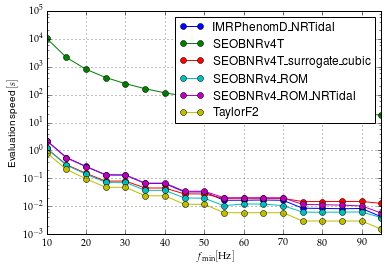

In [23]:
df.plot(style='o-', legend=True, logy=True, grid=True)
plt.xlabel(r'$f_\mathrm{min}[\mathrm{Hz}]$')
plt.ylabel(r'Evaluation speed $[s]$');
plt.savefig('Models_timings_all.pdf')
plt.savefig('Models_timings_all.png')

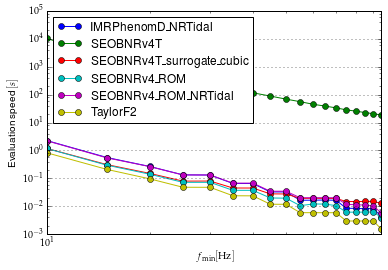

In [25]:
df.plot(style='o-', legend=True, loglog=True, grid=True)
plt.xlabel(r'$f_\mathrm{min}[\mathrm{Hz}]$')
plt.ylabel(r'Evaluation speed $[s]$');
plt.savefig('Models_timings_all_loglog.pdf')
plt.savefig('Models_timings_all_loglog.png')

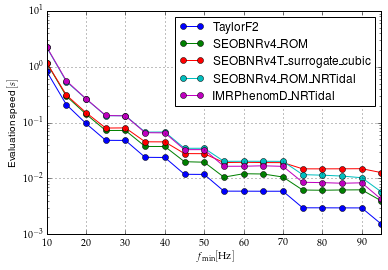

In [112]:
df.plot(y=['TaylorF2', 
           'SEOBNRv4\_ROM', 'SEOBNRv4T\_surrogate\_cubic',
           'SEOBNRv4\_ROM\_NRTidal', 'IMRPhenomD\_NRTidal'],
        style='o-', legend=True, logy=True, grid=True)
plt.xlabel(r'$f_\mathrm{min}[\mathrm{Hz}]$')
plt.ylabel(r'Evaluation speed $[s]$');
plt.savefig('Models_timings_FD.pdf')
plt.savefig('Models_timings_FD.png')

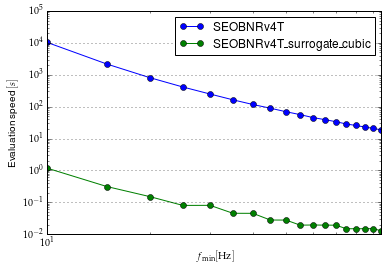

In [43]:
df.plot(y=['SEOBNRv4T', 'SEOBNRv4T\_surrogate\_cubic'], style='o-', legend=True, loglog=True, grid=True)
plt.xlabel(r'$f_\mathrm{min}[\mathrm{Hz}]$')
plt.ylabel(r'Evaluation speed $[s]$');

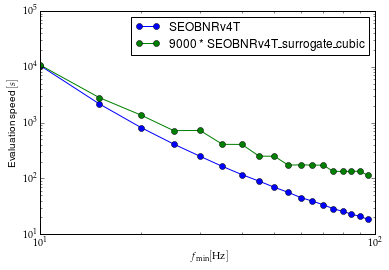

In [50]:
plt.loglog(df['SEOBNRv4T'], 'o-', label='SEOBNRv4T')
plt.loglog(9000*df['SEOBNRv4T\_surrogate\_cubic'], 'o-', label='9000 * SEOBNRv4T\_surrogate\_cubic')
plt.legend()
plt.xlabel(r'$f_\mathrm{min}[\mathrm{Hz}]$')
plt.ylabel(r'Evaluation speed $[s]$');

In [52]:
import statsmodels.api as sm

def fit_line(x, y):
    """Return slope, intercept of best fit line."""
    X = sm.add_constant(x)
    model = sm.OLS(y, X, missing='drop') # ignores entires where x or y is NaN
    fit = model.fit()
    return fit.params[1], fit.params[0] # could also return stderr in each via fit.bse

In [90]:
x, y = np.log10(df['SEOBNRv4T'].index), np.log10(df['SEOBNRv4T'].values)
#a,b = fit_line(x, y) # a linear fit is not sufficient
a,b,c = np.polyfit(x, y, 2) # quadratic is quite accurate
time_fit = lambda f: 10.0**(a*np.log10(f)**2 + b*np.log10(f) + c)

In [92]:
a,b,c

(1.161252760925906, -6.2405013786080055, 9.0814953369656681)

$$
\log_{10} \mathrm{time\_SEOBNRv4T} \sim 1.16 \log_{10}(f)^2 - 6.24 \log_{10}(f) + 9.08
$$

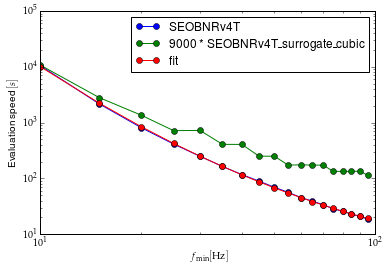

In [91]:
plt.loglog(df['SEOBNRv4T'], 'o-', label='SEOBNRv4T')
plt.loglog(9000*df['SEOBNRv4T\_surrogate\_cubic'], 'o-', label='9000 * SEOBNRv4T\_surrogate\_cubic')
plt.loglog(f_mins, time_fit(f_mins), 'o-', label='fit')
plt.legend()
plt.xlabel(r'$f_\mathrm{min}[\mathrm{Hz}]$')
plt.ylabel(r'Evaluation speed $[s]$');

## Check timing laptop vs vulcan

In [27]:
import lal
import lalsimulation as LS

def FD_waveform_test(Mtot, x, approximant, fLow=20.0, fHigh=16384.0, deltaF=0):
    q = 1.0/x[0]
    chi1 = x[1]
    chi2 = x[2]
    lambda1 = x[3]
    lambda2 = x[4]
    
    phiRef, fRef = 0.0, fLow
    distance, inclination = 1.0, 0.0
    
    m1 = q/(1.0+q)*Mtot
    m2 = 1.0/(1.0+q)*Mtot
    m1SI, m2SI, chi1, chi2, lambda1, lambda2, nk_max = m1*lal.MSUN_SI, m2*lal.MSUN_SI, chi1, chi2, lambda1, lambda2, -1

    longAscNodes, eccentricity, meanPerAno = 0,0,0

    LALpars = lal.CreateDict()
    LS.SimInspiralWaveformParamsInsertTidalLambda1(LALpars, lambda1)
    LS.SimInspiralWaveformParamsInsertTidalLambda2(LALpars, lambda2)

    # Nyquist frequency is set by fHigh
    # Can set deltaF = 0 to figure out required frequency spacing; the chosen deltaF depends on fLow
    
    # Documentation from LALSimInspiral.c
    #
    #  * This routine can generate TD approximants and transform them into the frequency domain.
    #  * Waveforms are generated beginning at a slightly lower starting frequency and tapers
    #  * are put in this early region so that the waveform smoothly turns on.
    #  *
    #  * If an FD approximant is used, this routine applies tapers in the frequency domain
    #  * between the slightly-lower frequency and the requested f_min.  Also, the phase of the
    #  * waveform is adjusted to introduce a time shift.  This time shift should allow the
    #  * resulting waveform to be Fourier transformed into the time domain without wrapping
    #  * the end of the waveform to the beginning.
    #  *
    #  * This routine assumes that f_max is the Nyquist frequency of a corresponding time-domain
    #  * waveform, so that deltaT = 0.5 / f_max.  If deltaF is set to 0 then this routine computes
    #  * a deltaF that is small enough to represent the Fourier transform of a time-domain waveform.
    #  * If deltaF is specified but f_max / deltaF is not a power of 2, and the waveform approximant
    #  * is a time-domain approximant, then f_max is increased so that f_max / deltaF is the next
    #  * power of 2.  (If the user wishes to discard the extra high frequency content, this must
    #  * be done separately.)
    
    hp, hc = LS.SimInspiralFD(m1SI, m2SI,
                     0.0, 0.0, chi1,
                     0.0, 0.0, chi2,
                     distance, inclination, phiRef, 
                     longAscNodes, eccentricity, meanPerAno, 
                     deltaF,
                     fLow, fHigh, fRef,
                     LALpars,
                     approximant)

    fHz = np.arange(hp.data.length)*hp.deltaF
    h = hp.data.data + 1j*hc.data.data
    
    return hp.deltaF

Speed ratio between vulcan headnode and my 2 year old MacBook Pro

In [28]:
%timeit FD_waveform_test(2.7, x, LS.SEOBNRv4T_surrogate, fLow=20.0, fHigh=2048.0, deltaF=0)

10 loops, best of 3: 90 ms per loop


In [29]:
%timeit FD_waveform_test(2.7, x, LS.SEOBNRv4T_surrogate, fLow=50.0, fHigh=2048.0, deltaF=0)

10 loops, best of 3: 20.3 ms per loop


In [30]:
%timeit FD_waveform_test(2.7, x, LS.TaylorF2, fLow=20.0, fHigh=2048.0, deltaF=0)

10 loops, best of 3: 72.7 ms per loop


In [31]:
%timeit FD_waveform_test(2.7, x, LS.TaylorF2, fLow=50.0, fHigh=2048.0, deltaF=0)

100 loops, best of 3: 7.68 ms per loop


In [32]:
0.096408 / 0.072

1.339

In [33]:
0.011781 / 0.00768

1.533984375

In [34]:
0.151097 / 0.09

1.6788555555555558

In [35]:
0.027730 / 0.0203

1.366009852216749